In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

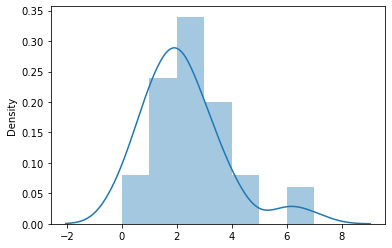

In [18]:
# A bank found that the average number of cars waiting during the noon hour at a drive-up window 
# follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and answer these questions concerning the probability of cars 
# waiting at the drive-up window.

cars_waiting = stats.poisson(2)
sns.distplot(cars_waiting.rvs(10*5))


In [25]:
# What is the probability that no cars drive up in the noon hour?

no_cars = cars_waiting.pmf(0)
no_cars

0.1353352832366127

In [26]:
# What is the probability that 3 or more cars come through the drive through?

three_or_more = cars_waiting.sf(2)
three_or_more

0.32332358381693654

In [27]:
# How likely is it that the drive through gets at least 1 car?

one_or_more = cars_waiting.sf(0)
one_or_more

0.8646647167633873

In [28]:
# Grades of State University graduates are normally distributed with a mean of 3.0 
# and a standard deviation of .3. Calculate the following:

grades = stats.norm(3, .3)
grades

In [33]:
# What grade point average is required to be in the top 5% of the graduating class?

grades.isf(.049)

3.4963883707053234

In [34]:
# What GPA constitutes the bottom 15% of the class?

grades.ppf(.15)

2.689069983151863

In [36]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 
# Would a student with a 2.8 grade point average qualify for this scholarship?

grades.ppf(.349)
# yes, 2.8 gpa qualifies

2.883593500134607

In [37]:
# If I have a GPA of 3.5, what percentile am I in?

grades.cdf(3.5)
# 95% percentile

0.9522096477271853

In [40]:
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?

clicks = stats.binom(4326, .02)
clicks.sf(96)

0.13975823631416445

In [ ]:
# You are working on some statistics homework consisting of 100 questions where all of the answers 
# are a probability rounded to the hundreths place. Looking to save time, 
# you put down random probabilities as the answer to each question.


In [42]:
# What is the probability that at least one of your first 60 answers is correct?

homework = stats.binom(60, .01)
homework.sf(0)

0.45284335760923855

In [46]:
# The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? 

avg_daily_visits = (3*22) * .9
clean = stats.binom(avg_daily_visits, .03).sf(0)
clean

0.8362274861228872

In [59]:
# How likely is it that it goes two days without getting cleaned up? 

two_days = (stats.binom(avg_daily_visits, .03).cdf(0)) ** 2
two_days

0.026821436301629097

In [60]:
# All week?

week = stats.binom(avg_daily_visits, .03).cdf(0) ** 5
week

0.00011781621791055168

In [68]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line 
# when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go 
# back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

line = stats.norm(15, 3)
time = (60 - 15 - 10)//2

line.cdf(time)

0.7475074624530771

In [82]:
# Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation. For the following questions, 
# calculate the answer based on modeling the employees salaries with a normal distribution defined 
# by the calculated mean and standard deviation then compare this answer to the actual values present 
# in the salaries dataset.

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [86]:
pd.read_sql('SELECT * FROM salaries', url)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30
2844043,499999,67043,1998-11-30,1999-11-30
2844044,499999,70745,1999-11-30,2000-11-29
2844045,499999,74327,2000-11-29,2001-11-29


In [90]:
sql = '''
SELECT
    *
FROM salaries
WHERE to_date >= CURDATE()
'''

salaries = pd.read_sql(sql, url)
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [93]:
avg_salary = salaries.salary.mean()
avg_salary

72012.23585730705

In [95]:
stdev = salaries.salary.std()
stdev

17309.99538025198

In [97]:
norm_dev = stats.norm(avg_salary, stdev)

In [99]:
# What percent of employees earn less than 60,000?

norm_dev.cdf(59999)

0.2438393099761686

In [100]:
# What percent of employees earn more than 95,000?

norm_dev.sf(95000)

0.09208819199804053

In [101]:
# What percent of employees earn between 65,000 and 80,000?

norm_dev.cdf(80000) - norm_dev.sf(65000)

0.020466412445969473

In [102]:
# What do the top 5% of employees make?

norm_dev.isf(.05)

100484.64454102777